# Relatório

In [2]:
# Bibliotecas Usadas

import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("setup ok!")

setup ok!


In [3]:
#Caminho onde estão localizados os arquivos de imagem
caminho_benigno = r'DataSet\all_nods_benignos'

caminho_maligno = r'DataSet\all_nods_malignos'

#Montando as listas com os nomes dos arquivos
for root, dirs, files in os.walk(caminho_benigno):
    dataset_benigno = [file for file in files]

for root, dirs, files in os.walk(caminho_maligno):
    dataset_maligno = [file for file in files]

dataset = sorted(dataset_benigno + dataset_maligno)


#Selecionando uma imagem qualquer
img_selecionada = random.choice(dataset)


#Definindo o caminho para uso da função cv2.read() e posterior mostra da imagem.
if img_selecionada in dataset_benigno:
    path = caminho_benigno + "\\" + img_selecionada
    img = cv2.imread(path)
else:
    path = caminho_maligno + "\\" + img_selecionada
    img = cv2.imread(path)

#fazendo a conversão para tons de cinza
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



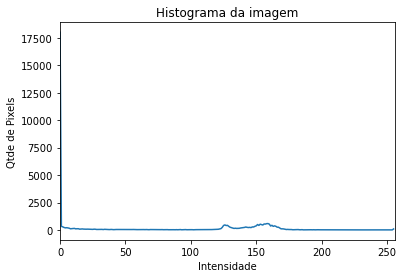

-1

In [4]:
#Mostrando a imagem original
cv2.imshow(f"Imagem {img_selecionada}", img)


#montando o histograma da imagem
h = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma da imagem")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()

cv2.waitKey(0)

In [5]:
#Fazendo suavização pelo filtro gausiano e verificando a binarização da imagem
lim = int(input("digite o valor do limite a ser usado:"))

suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(suave, lim, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, lim, 255, cv2.THRESH_BINARY_INV)
resultado = np.vstack([
    np.hstack([suave, bin]),
    np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])
    ])

cv2.imshow(f"Binarização da imagem {img_selecionada}", resultado)
cv2.waitKey(0)

digite o valor do limite a ser usado:145


-1